# Kaggle API

In [2]:
!pip install kaggle
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


# Downloading Dataset

In [6]:
import os
! mkdir .kaggle
! mv kaggle.json .kaggle/
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge --force
! cp ".kaggle/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013.tar.gz" .
! tar -xzf fer2013.tar.gz
os.listdir()

mkdir: cannot create directory ‘.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory
example_submission.csv: Downloaded 7KB of 7KB to /content/.kaggle/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge
fer2013.tar.gz: Downloaded 92MB of 92MB to /content/.kaggle/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge


['datalab',
 '.config',
 '.local',
 'fer2013',
 '.rnd',
 '.cache',
 'fer2013.tar.gz',
 '.kaggle',
 '.forever',
 '.ipython']

# Data Preprocessing

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
dataset = pd.read_csv('fer2013/fer2013.csv')
print(dataset.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [0]:
y = dataset.iloc[:,0:1].values

X = np.zeros(shape=(dataset.shape[0],48,48))

for i in range(dataset.shape[0]):
    a = dataset['pixels'][i].split(' ')
    b = [int(x) for x in a]
    c = np.asarray(b,dtype = 'float32')
    d = c.reshape(48,48)
    X[i] = d
    
X = X.astype('float32')
X = X/255

classes = 7

In [0]:
index1 = 28709 # Cross-Validation SET ( Public Test )
index2 = 32298 # Final Test SET ( Private Test )

X_train = X[0:index1,:]
X_validate = X[index1:index2,:]
X_test = X[index2:,:]
y_train = y[0:index1,:]
y_validate = y[index1:index2,:]
y_test = y[index2:,:]

In [11]:
print(X_train.shape)
print(y_train.shape)

(28709, 48, 48)
(28709, 1)


In [0]:
# X

# Neural Network

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation,Convolution2D,MaxPooling2D,BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# Data Reshaping
y_train = np_utils.to_categorical(y_train,classes)
y_validate = np_utils.to_categorical(y_validate,classes)
y_test = np_utils.to_categorical(y_test,classes)
X_train = X_train.reshape(X_train.shape[0],48,48,1)
X_validate = X_validate.reshape(X_validate.shape[0],48,48,1)
X_test = X_test.reshape(X_test.shape[0],48,48,1)

In [14]:
print(X_train.shape)
print(y_train.shape)

(28709, 48, 48, 1)
(28709, 7)


In [0]:
model = Sequential()
# =============================================================================
# Section 1
# =============================================================================
model.add(Convolution2D(128,(4,4),input_shape=(48,48,1),strides = 1))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# =============================================================================
# Section 2
# =============================================================================
model.add(Convolution2D(128,(4,4),strides = 1,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

# =============================================================================
# Section 3
# =============================================================================
model.add(Convolution2D(128,(4,4),strides = 1))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(0.2))

# =============================================================================
# Section 4
# =============================================================================
model.add(Convolution2D(128,(4,4),strides = 1,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

# =============================================================================
# Section 5
# =============================================================================
model.add(Convolution2D(128,(4,4),strides = 1))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(0.2))

# =============================================================================
# Section 6
# =============================================================================
model.add(Convolution2D(128,(4,4),strides = 1,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

# =============================================================================
# Section 7
# =============================================================================
model.add(Convolution2D(128,(2,2),strides = 1))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(0.2))


model.add(Flatten())

# =============================================================================
# Section 8
# =============================================================================
model.add(Dense(1024))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# =============================================================================
# Section 9
# =============================================================================
model.add(Dense(1024))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# =============================================================================
# Section 10
# =============================================================================
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 45, 45, 128)       2176      
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 45, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 45, 45, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 128)       262272    
_________________________________________________________________
batch_normalization_2 (Batch (None, 45, 45, 128)       512       
_________________________________________________________________
activation_2 (Activation)    (None, 45, 45, 128)       0         
__________

In [0]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.train_losses = []
        self.val_losses = []

    def on_epoch_end(self, batch, logs={}):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

In [0]:
class AccHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.train_acc = []
        self.val_acc = []

    def on_epoch_end(self, batch, logs={}):
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

In [0]:
history1 = LossHistory()
history2 = AccHistory()
from keras.callbacks import ModelCheckpoint
filepath1="weights.best.acc.221_model.hdf5"
filepath2="weights.best.loss.221_model.hdf5"
checkpoint1 = ModelCheckpoint(filepath1, monitor='val_acc',
                              verbose=1, save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath2, monitor='val_loss',
                              verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint1,checkpoint2,history1,history2]


In [20]:
model.fit(X_train, y_train, 
          batch_size=128,shuffle = True, epochs=16, verbose=2, validation_data = (X_validate,y_validate),callbacks=callbacks_list)

Train on 28709 samples, validate on 3589 samples
Epoch 1/16
 - 132s - loss: 1.7684 - acc: 0.3353 - val_loss: 1.7206 - val_acc: 0.3444

Epoch 00001: val_acc improved from -inf to 0.34439, saving model to weights.best.acc.221_model.hdf5

Epoch 00001: val_loss improved from inf to 1.72057, saving model to weights.best.loss.221_model.hdf5
Epoch 2/16
 - 126s - loss: 1.4476 - acc: 0.4589 - val_loss: 1.8771 - val_acc: 0.2725

Epoch 00002: val_acc did not improve from 0.34439

Epoch 00002: val_loss did not improve from 1.72057
Epoch 3/16
 - 126s - loss: 1.2820 - acc: 0.5228 - val_loss: 2.5034 - val_acc: 0.3798

Epoch 00003: val_acc improved from 0.34439 to 0.37977, saving model to weights.best.acc.221_model.hdf5

Epoch 00003: val_loss did not improve from 1.72057
Epoch 4/16
 - 126s - loss: 1.1861 - acc: 0.5581 - val_loss: 1.2136 - val_acc: 0.5467

Epoch 00004: val_acc improved from 0.37977 to 0.54667, saving model to weights.best.acc.221_model.hdf5

Epoch 00004: val_loss improved from 1.72057 

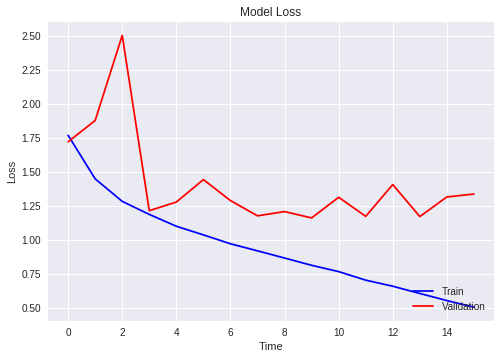

In [24]:
loss_path = '_Loss_Curve'
plt.plot(history1.train_losses,color = 'blue')
plt.plot(history1.val_losses,color = 'red')
#plt.plot(history.history['val_acc'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
# plt.savefig(model_name+loss_path+'.png')

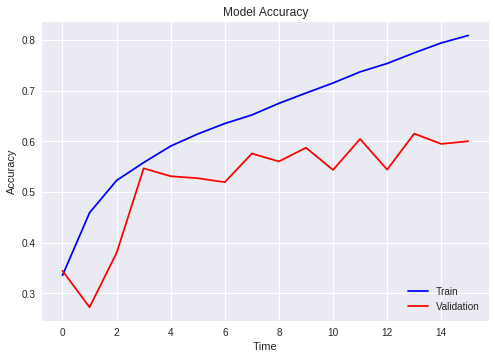

In [23]:
acc_path = '_Accuracy_Curve'
plt.plot(history2.train_acc,color = 'blue')
plt.plot(history2.val_acc,color = 'red')
#plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Time')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
# plt.savefig(model_name+acc_path+'.png')

In [25]:
print(history1.train_losses)
print(history1.val_losses)
print(min(history1.val_losses))

[1.7684208375873052, 1.4476113713411725, 1.282040776559986, 1.1861418135267734, 1.0989109242513446, 1.035396707307508, 0.9700840688921897, 0.9179292827934933, 0.8650919541411898, 0.8115023963565741, 0.7652109952226918, 0.7022555126176034, 0.6576346969910934, 0.6042703234429785, 0.5520961460042321, 0.5031868589877784]
[1.7205718573370694, 1.8770987245491135, 2.503363226708279, 1.2136421099815837, 1.2769562060801756, 1.4420427008570653, 1.2880569717019805, 1.175551215962601, 1.2069757787853803, 1.1602003751740413, 1.3122124570297578, 1.171778973778432, 1.4056289732107448, 1.1701764037729339, 1.3146248656948087, 1.3360746520646405]
1.1602003751740413


In [26]:
print(history2.train_acc)
print(history2.val_acc)
print(max(history2.val_acc))

[0.335330384216686, 0.458915322734593, 0.5227628966214751, 0.558082831186612, 0.5906510153298942, 0.6145111289329632, 0.6351666724409046, 0.652060329476022, 0.674979971408462, 0.695356856711984, 0.7151415931912333, 0.7371207634862628, 0.753700930055163, 0.7746699641269013, 0.7942108746303104, 0.8091190915802994]
[0.3443856227402901, 0.27249930342713846, 0.3797715241346362, 0.5466703817302319, 0.5310671496321544, 0.5271663416034832, 0.5193647255585964, 0.5759264419141271, 0.5603232098118978, 0.5873502368389248, 0.5436054611353862, 0.6046252438337167, 0.5441627194246033, 0.6152131513039293, 0.594873223743355, 0.600167177490917]
0.6152131513039293


In [27]:
print(X_validate.shape)
print(y_validate.shape)


(3589, 48, 48, 1)
(3589, 7)


In [0]:
# Comparison based on Losses ( Min )
model.load_weights(filepath1)

In [29]:
validation_score = model.evaluate(X_validate, y_validate, verbose=1)
test_score = model.evaluate(X_test, y_test, verbose=1)
print(' Validation SET Accuracy = '+ str(validation_score[1]*100))
print(' Test SET Accuracy = '+ str(test_score[1]*100))


3589/3589 [==============================] - 8s 2ms/step
 Validation SET Accuracy = 61.52131513039293
 Test SET Accuracy = 62.71942045470074


In [0]:
# Comparison based on Accuracy ( Max )
model.load_weights(filepath1)

In [31]:
validation_score = model.evaluate(X_validate, y_validate, verbose=1)
test_score = model.evaluate(X_test, y_test, verbose=1)
print(' Validation SET Accuracy = '+ str(validation_score[1]*100))
print(' Test SET Accuracy = '+ str(test_score[1]*100))


3589/3589 [==============================] - 8s 2ms/step
 Validation SET Accuracy = 61.52131513039293
 Test SET Accuracy = 62.71942045470074


# Visualization

In [0]:
config = model.get_config()

In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [0]:
file = 'weights.hdf5'
model.save_weights(file)

In [61]:
os.listdir()

['datalab',
 '.config',
 'fer2013',
 '.nv',
 '.forever',
 '.keras',
 '.rnd',
 '.ipython',
 '.kaggle',
 'weights.best.loss.221_model.hdf5',
 '.cache',
 '.local',
 'weights.best.acc.221_model.hdf5',
 'fer2013.tar.gz']

In [0]:
from google.colab import files
files.download(filepath1)
files.download(filepath2)

In [0]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [65]:
score = model.evaluate(X_train,y_train,verbose = 1)
score

28709/28709 [==============================] - 64s 2ms/step


[0.4342271980519637, 0.8478874220648439]

In [66]:
alpha = model.evaluate(X_validate,y_validate,verbose=1)
alpha

3589/3589 [==============================] - 8s 2ms/step


[1.170176429813637, 0.6152131513039293]

In [67]:
beta = model.evaluate(X_test,y_test,verbose=1)
beta

3589/3589 [==============================] - 8s 2ms/step


[1.1567937461205198, 0.6271942045470074]

# Metrics

In [0]:
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

In [32]:
y_prob = model.predict(X_test, batch_size=32, verbose=1)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_test]

3589/3589 [==============================] - 8s 2ms/step


In [33]:
!pip install brewer2mpl
import matplotlib
import brewer2mpl
set3 = brewer2mpl.get_map('Set3', 'qualitative', 7).mpl_colors

In [0]:
def plot_subjects(start, end, y_pred, y_true, title=False):
    fig = plt.figure(figsize=(12,12))
    emotion = {0:'Angry',1:'Disgust',2:'Fear', 3:'Happy', 4:'Sad',5:'Surprise',6:'Neutral'}
    for i in range(start, end+1):
        input_img = X[i+index2]
        ax = fig.add_subplot(6,6,i+1)
        ax.imshow(input_img, cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if y_pred[i] != y_true[i]:
            plt.xlabel(emotion[y_true[i]], color='#53b3cb',fontsize=12)
        else:
            plt.xlabel(emotion[y_true[i]], fontsize=12)
        if title:
            plt.title(emotion[y_pred[i]], color='blue')
        plt.tight_layout()
    plt.show()

In [0]:
def plot_probs(start,end, y_prob):
    fig = plt.figure(figsize=(12,12))
    for i in range(start, end+1):
        input_img = X[i+index2]
        ax = fig.add_subplot(6,6,i+1)
        ax.bar(np.arange(0,7), y_prob[i], color=set3,alpha=0.9)
        ax.set_xticks(np.arange(0.5,7.5,1))
        labels = ['angry', 'disgust', 'fear', 'happy' ,'sad', 'surprise' ,'neutral']
        ax.set_xticklabels(labels, rotation=90 ,fontsize=12)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()

In [0]:
def plot_subjects_with_probs(start, end, y_prob):
    iter = (end - start)/6
    for i in np.arange(0,iter):
        plot_subjects(int(i*6),int((i+1)*6-1), y_pred, y_true, title=False)
        plot_probs(int(i*6),int((i+1)*6-1), y_prob)

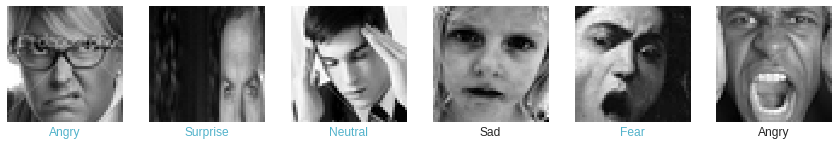

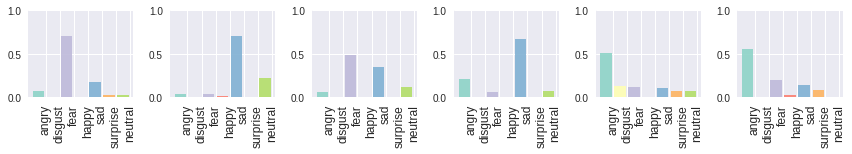

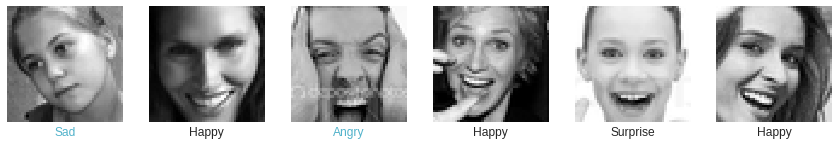

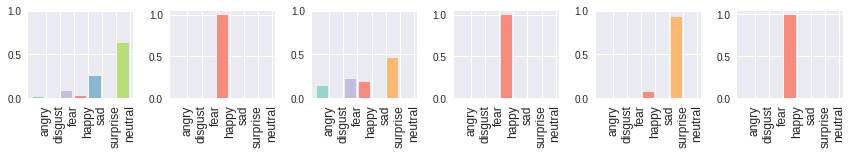

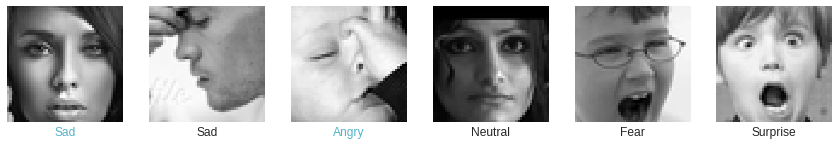

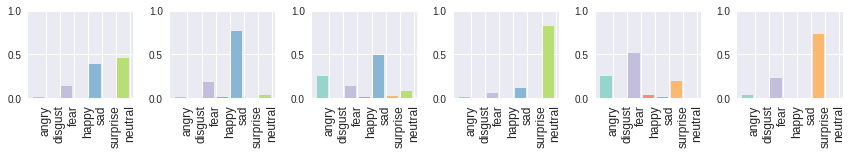

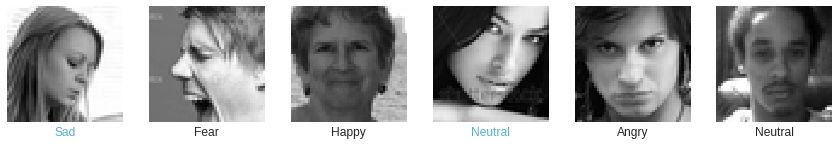

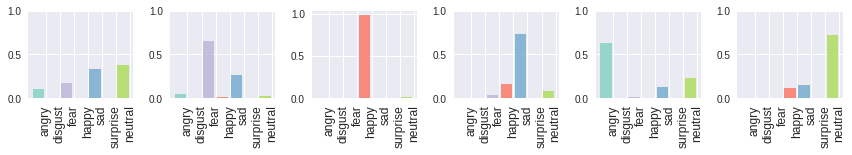

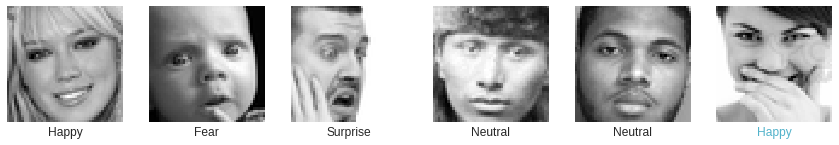

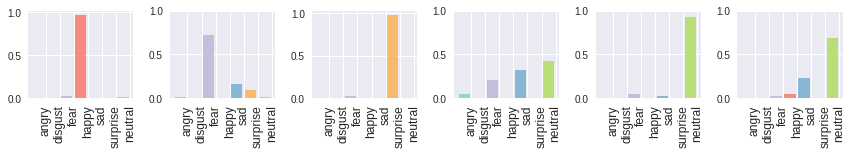

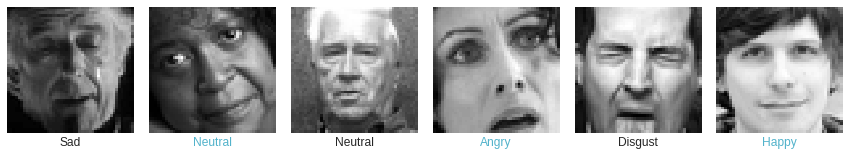

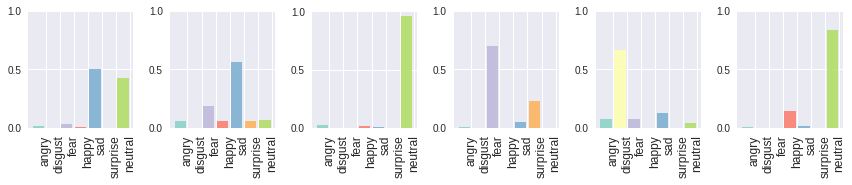

In [37]:
plot_subjects_with_probs(0, 36, y_prob)

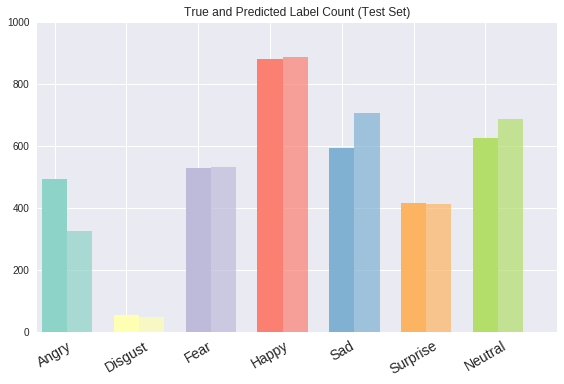

In [39]:
def plot_distribution(y_true, y_pred):
    ind = np.arange(1.5,8,1)  # the x locations for the groups
    width = 0.35   
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true), width, color=set3, alpha=1.0)
    pred = ax.bar(ind + width, np.bincount(y_pred), width, color=set3, alpha=0.7)
    ax.set_xticks(np.arange(1.5,8,1))
    labels = ['Angry', 'Disgust', 'Fear', 'Happy' ,'Sad', 'Surprise' ,'Neutral']
    ax.set_xticklabels(labels, rotation=30, fontsize=14)
    ax.set_xlim([1.25, 8.5])
    ax.set_ylim([0, 1000])
    ax.set_title('True and Predicted Label Count (Test Set)')
    plt.tight_layout()
    plt.show()
    
plot_distribution(y_true, y_pred)

In [0]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    fig = plt.figure(figsize=(5,5))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    # ax.set_title('Confusion Matrix')
    labels = ['Angry', 'Disgust', 'Fear', 'Happy' ,'Sad', 'Surprise' ,'Neutral']
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[213   9  62  31  87  14  75]
 [  9  32   3   4   3   1   3]
 [ 38   3 250  24 113  42  58]
 [  7   1  27 735  31  28  50]
 [ 35   1  73  39 332   8 106]
 [  8   1  60  14  11 309  13]
 [ 14   1  56  38 127  10 380]]


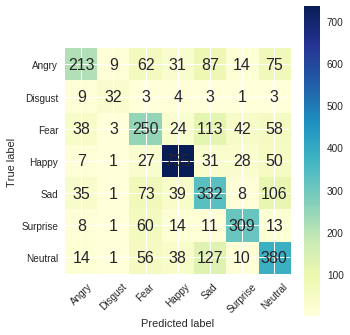

In [44]:
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)

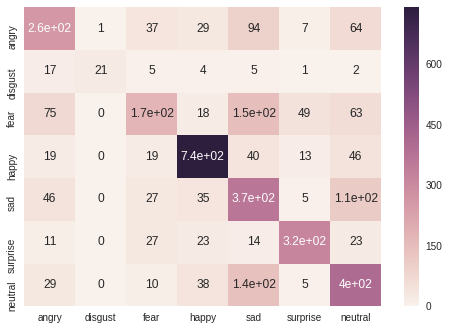

In [50]:
# Heat Map

labels = ['angry', 'disgust', 'fear', 'happy' ,'sad', 'surprise' ,'neutral']

import seaborn as sn
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm,index = [labels[i] for i in range(0,7)],columns = [labels[i] for i in range(0,7)])
sn.set(font_scale = 1)
sn.heatmap(df_cm,annot = True)


In [0]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy' ,'Sad', 'Surprise' ,'Neutral']

In [0]:
def class_precision(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    col = [cm[j,i] for j in range(0,7)]
    return float(col[i])/sum(col)

def class_recall(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    row = [cm[i,j] for j in range(0,7)]
    return float(row[i])/sum(row)

def class_accuracy(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    tp = cm[i,i]
    fn = sum([cm[i,j] for j in range(0,7) if j != i])
    fp = sum([cm[j,i] for j in range(0,7) if j != i])
    tn = sum([cm[i,j] for j in range(0,7) for i in range(0,7)]) -(tp+fp+fn)
    return float(tp + tn)/sum([tp, fn, fp, tn])

In [47]:
for emotion in labels:
    print (emotion)
    print ('   acc = {}'.format(class_accuracy(y_true, y_pred, emotion)))
    print ('  prec = {}'.format(class_precision(y_true, y_pred, emotion)))
    print ('recall = {}\n'.format(class_recall(y_true, y_pred, emotion)))

Angry
   acc = 0.8916132627472834
  prec = 0.6574074074074074
recall = 0.43380855397148677

Disgust
   acc = 0.9891334633602675
  prec = 0.6666666666666666
recall = 0.5818181818181818

Fear
   acc = 0.844246308163834
  prec = 0.4708097928436911
recall = 0.4734848484848485

Happy
   acc = 0.9180830314850933
  prec = 0.8305084745762712
recall = 0.8361774744027304

Sad
   acc = 0.8233491223181945
  prec = 0.4715909090909091
recall = 0.5589225589225589

Surprise
   acc = 0.9414878796322095
  prec = 0.75
recall = 0.7427884615384616

Neutral
   acc = 0.8464753413207021
  prec = 0.5547445255474452
recall = 0.6070287539936102



In [54]:
from sklearn.metrics import classification_report
print (classification_report(y_true, y_pred, target_names=labels))


             precision    recall  f1-score   support

      angry       0.57      0.53      0.55       491
    disgust       0.95      0.38      0.55        55
       fear       0.58      0.33      0.42       528
      happy       0.83      0.84      0.84       879
        sad       0.45      0.62      0.52       594
   surprise       0.80      0.76      0.78       416
    neutral       0.57      0.65      0.60       626

avg / total       0.65      0.64      0.63      3589



In [48]:
n = len(y_true)
y_fir = []
y_sec = []
y_trd = []
for i in range(n):
    if y_true[i] == np.argsort(y_prob[i])[-1]:
        y_fir.append([i, y_true[i]])
    if y_true[i] == np.argsort(y_prob[i])[-2]:
        y_sec.append([i, y_true[i]])
    if y_true[i] == np.argsort(y_prob[i])[-3]:
        y_trd.append([i, y_true[i]])
print (float(len(y_fir))/n)
print (float(len(y_sec))/n)
print (float(len(y_trd))/n)

0.6271942045137922
0.181666202284759
0.09166898857620508


In [0]:
misclass = [float(len(y_fir))/n, float(len(y_sec))/n, float(len(y_trd))/n]

(array([ 91.,   8.,   0., 169.,   0.,  56., 130.,   0.,  42., 133.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

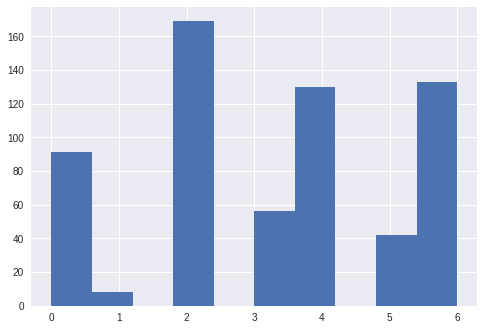

In [57]:
plt.hist([pair[1] for pair in y_sec])

In [50]:
from sklearn.metrics import hamming_loss
hamming_loss(y_true, y_pred)

0.37280579548620785

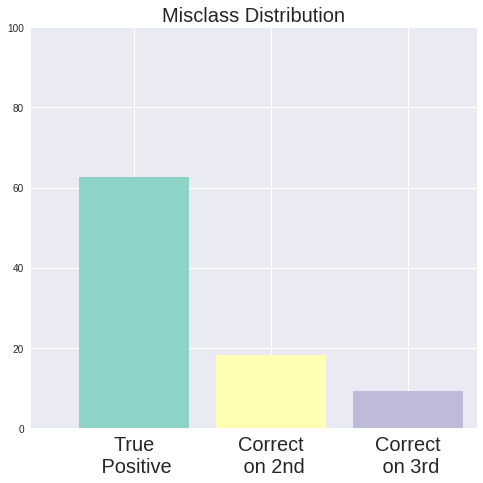

In [64]:
def plot_misclass_distribution(y, tags): 
    fig = plt.figure(figsize=(7,7))
    ax1 = fig.add_subplot(1,1,1)
    ax1.bar(np.arange(1.5,len(y)+1.5), np.array(y)*100, color=set3, alpha=1)
    ax1.set_xticks(np.arange(1.5,len(y)+2,1))
    ax1.set_xticklabels(tags, rotation=0, fontsize=20)
    ax1.set_xlim([0.75, len(y)+1])
    ax1.set_ylim([0,100])
    ax1.grid(True)
    ax1.set_title('Misclass Distribution',fontsize = 20)
    plt.tight_layout()
    plt.show()
tags = ['True\n Positive','Correct\n on 2nd','Correct\n on 3rd']
plot_misclass_distribution(misclass, tags)